In [1]:
import numpy as np
import scipy
import poppy
if poppy.accel_math._USE_CUPY:
    import cupy as xp
    import cupyx.scipy as _scipy
else:
    xp = np
    _scipy = scipy
    
from poppy.poppy_core import PlaneType

import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import astropy.units as u
from astropy.io import fits
from pathlib import Path
from IPython.display import clear_output, display

# import zosapi
# from System import Enum,Int32,Double,Array
from pathlib import Path

from importlib import reload

# import logging, sys
# poppy_log = logging.getLogger('poppy')
# poppy_log.setLevel('DEBUG')
# logging.basicConfig(stream=sys.stdout, level=logging.DEBUG)

# poppy_log.disabled = True

import warnings
warnings.filterwarnings("ignore")

from prop_models import ote_model

from imshows import imshow1, imshow2, imshow3

pupil_diam = 6.5*u.m
wavelength_c = 650e-9*u.m

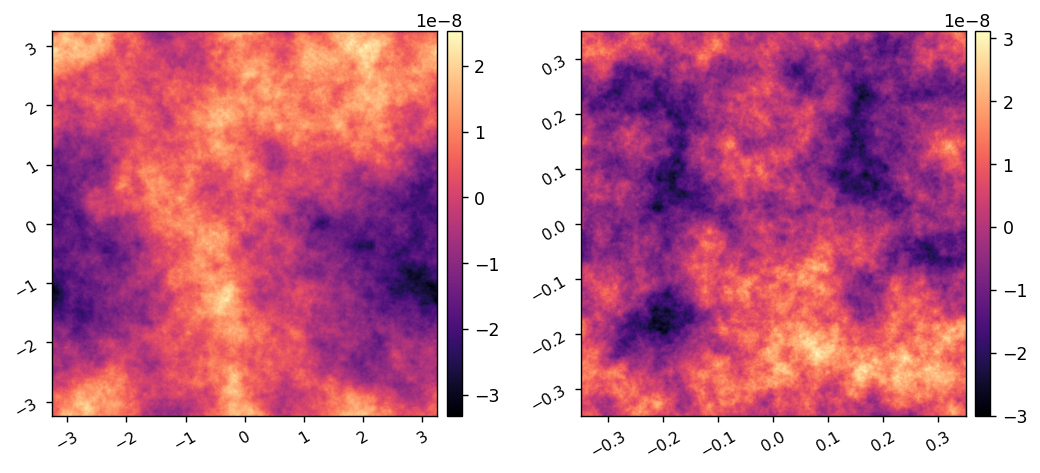

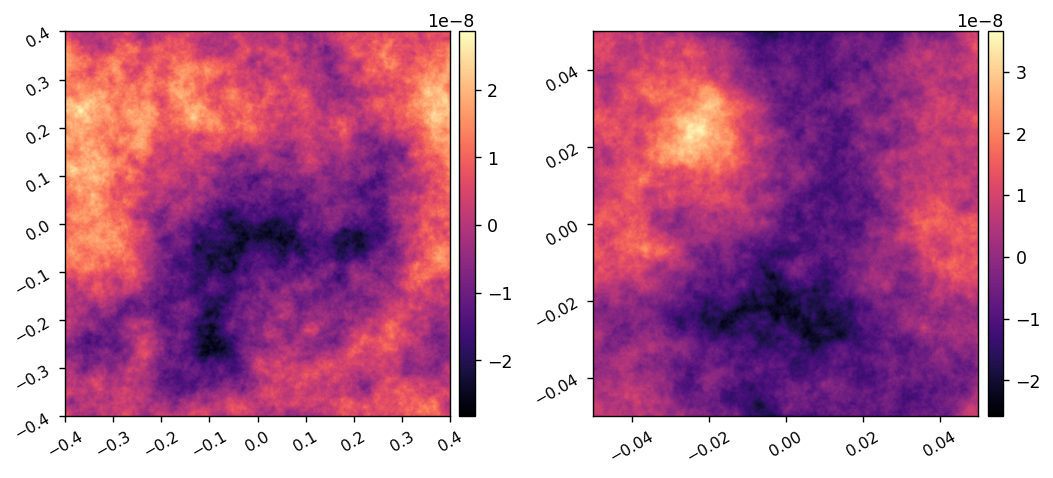

In [94]:
imshow2(ote.m1_opd.opd, ote.m2_opd.opd, 
        pxscl1=ote.m1_opd.pixelscale, pxscl2=ote.m2_opd.pixelscale)

imshow2(ote.m3_opd.opd, ote.m4_opd.opd, 
        pxscl1=ote.m3_opd.pixelscale, pxscl2=ote.m4_opd.pixelscale)

Oversampling > 2x suggested for reliable results in Fresnel propagation.
Oversampling > 2x suggested for reliable results in Fresnel propagation.
Oversampling > 2x suggested for reliable results in Fresnel propagation.
Oversampling > 2x suggested for reliable results in Fresnel propagation.
Oversampling > 2x suggested for reliable results in Fresnel propagation.


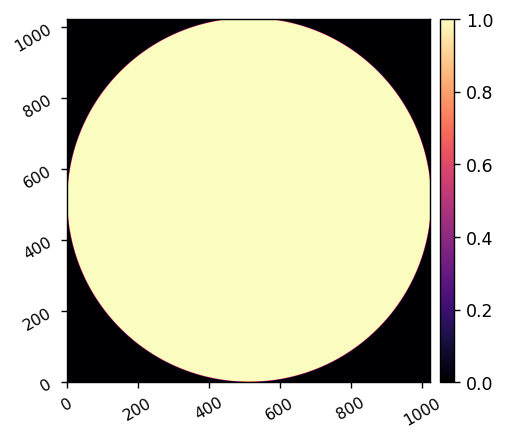

In [103]:
reload(ote_model)
ote = ote_model.OTE()

ote.npix = 1024
ote.oversample = 4

imshow1(ote.pupil_mask)

After resampling, optic phasor shape (1238, 1238) is smaller than input wavefront (4096, 4096); will zero-pad the rescaled array.
After resampling, optic phasor shape (1699, 1699) is smaller than input wavefront (4096, 4096); will zero-pad the rescaled array.


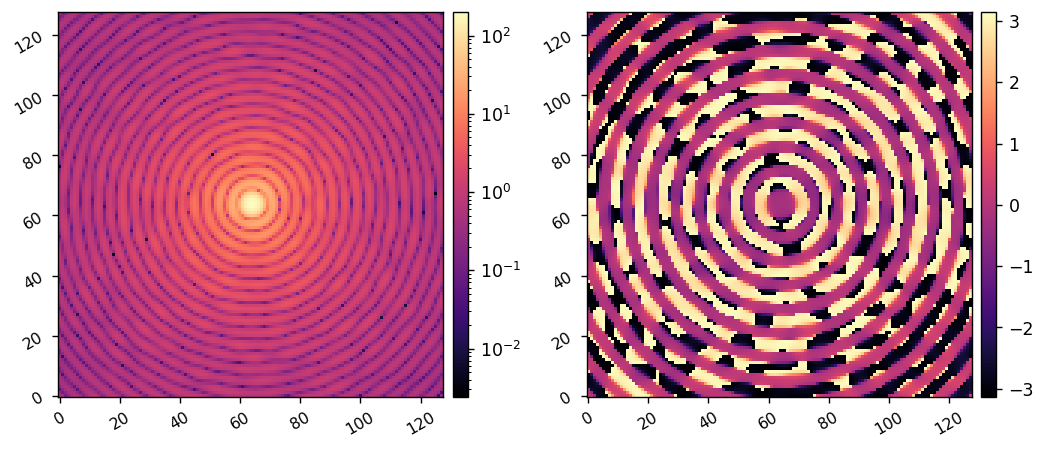

In [104]:
ote.defocus = -0.0*u.mm
psf = ote.calc_psf()
imshow2(xp.abs(psf), xp.angle(psf), lognorm1=True, npix=128)

After resampling, optic phasor shape (1238, 1238) is smaller than input wavefront (4096, 4096); will zero-pad the rescaled array.
After resampling, optic phasor shape (1699, 1699) is smaller than input wavefront (4096, 4096); will zero-pad the rescaled array.
Oversampling > 2x suggested for reliable results in Fresnel propagation.
Oversampling > 2x suggested for reliable results in Fresnel propagation.


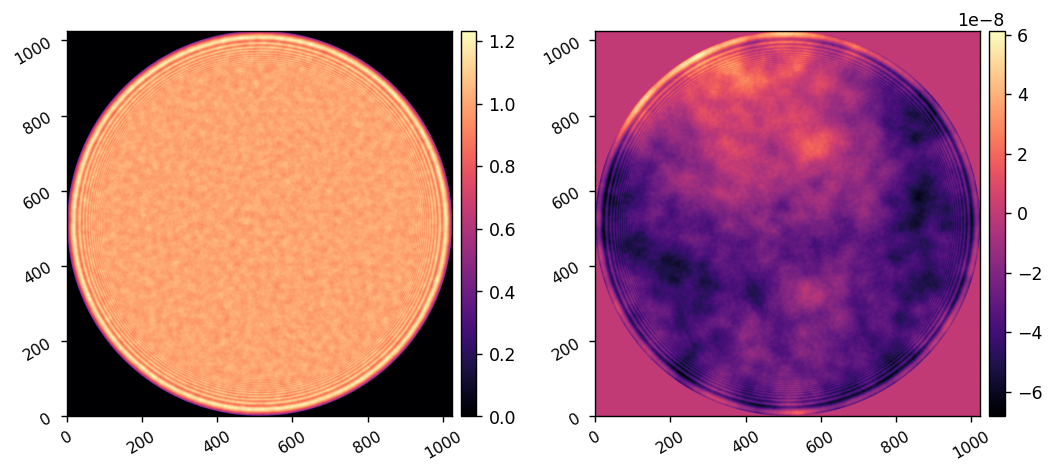

In [105]:
pupil_amp, pupil_opd = ote.calc_pupil()
imshow2(pupil_amp, pupil_opd)

In [59]:
reload(ote_model)
ote = ote_model.OTE()

ote.npix = 1024
ote.oversample = 4

ote.use_opds = False
wfs = ote.calc_wfs()

Oversampling > 2x suggested for reliable results in Fresnel propagation.
Oversampling > 2x suggested for reliable results in Fresnel propagation.
Oversampling > 2x suggested for reliable results in Fresnel propagation.
Oversampling > 2x suggested for reliable results in Fresnel propagation.


Propagating wavelength 650.000 nm.
PSF calculated in 0.156s


0.0 m 0.0 m


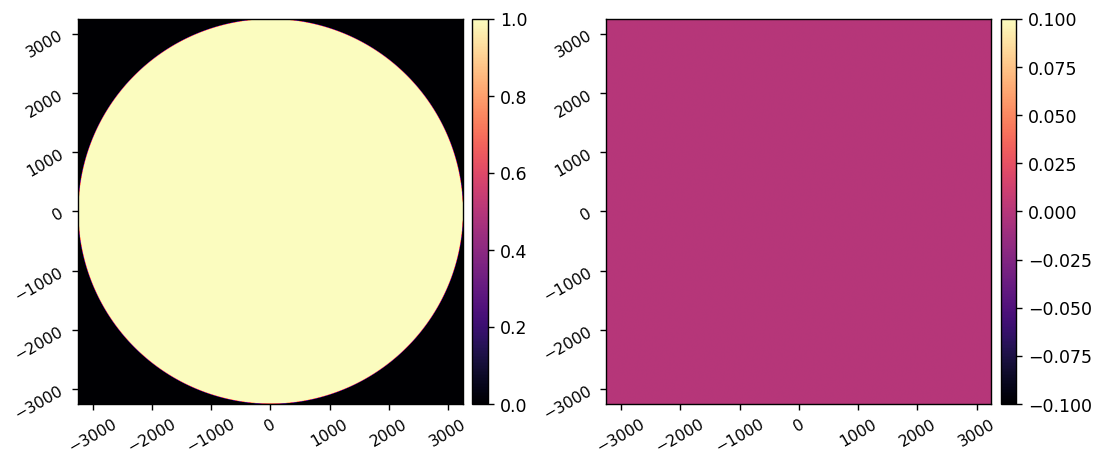

18.264810118371386 m 0.0 m


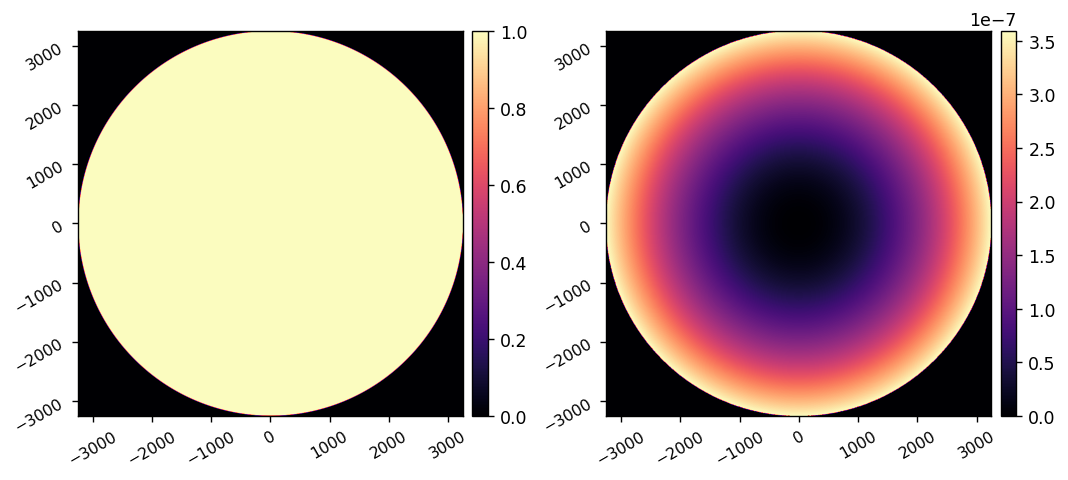

32.07214420307163 m 16.63812910134875 m


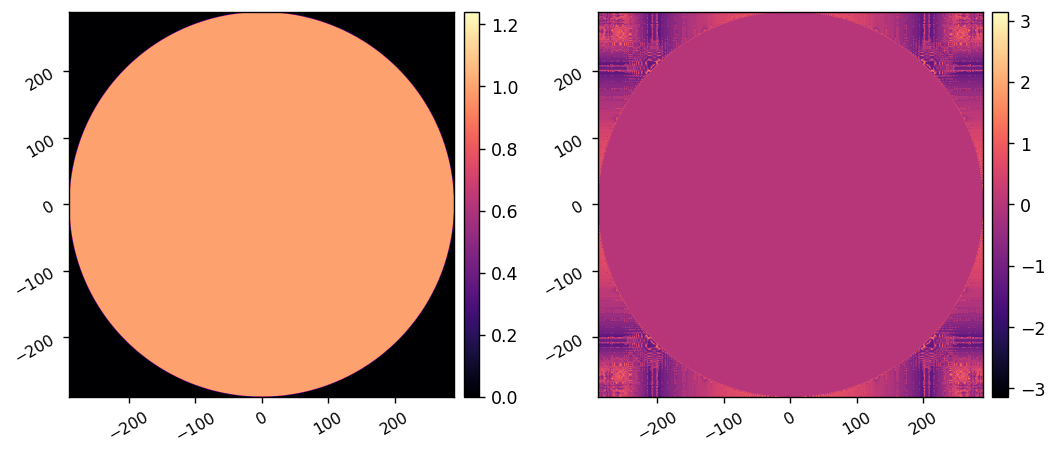

39.11884140147583 m 35.13812910134875 m


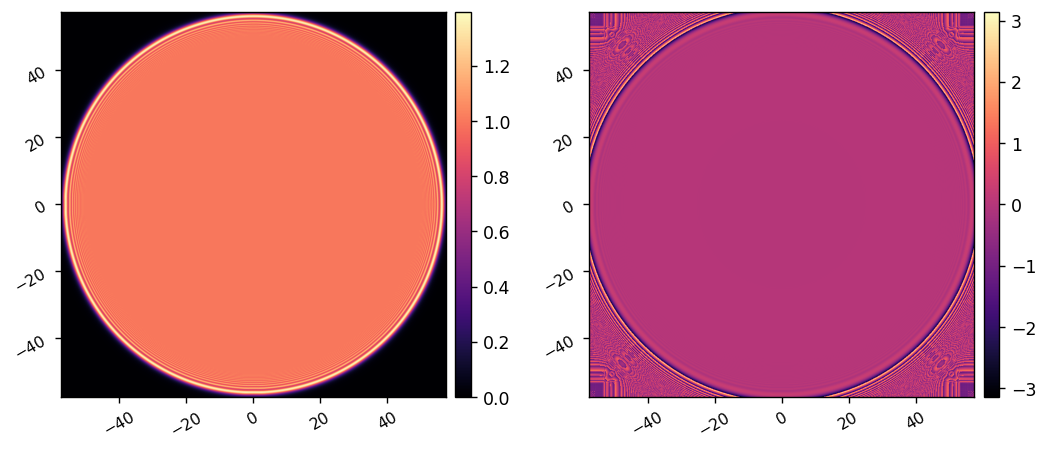

39.11884140147583 m 33.24312910134875 m


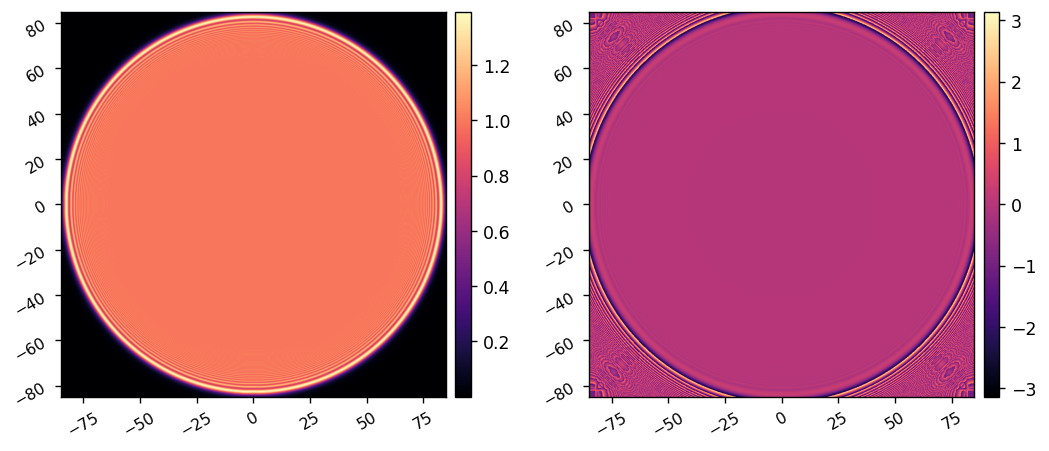

39.11884140147583 m 35.32884124521294 m


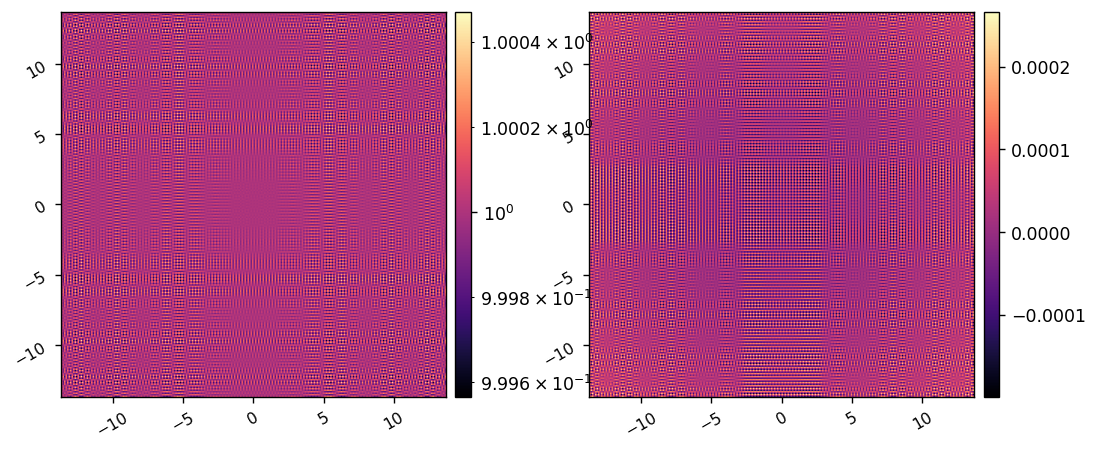

In [60]:
for i,wf in enumerate(wfs):
    if i<(len(wfs)-1):
        npix = ote.npix 
        lognorm = False
    else:
        npix = 256
        lognorm = True
    print(wf.z_w0, wf.z)
    imshow2(wf.intensity, wf.phase, pxscl=wf.pixelscale.to(u.mm/u.pix), npix=npix, lognorm1=lognorm)

In [31]:
41.41526194839787 - 43.099553545340015

-1.6842915969421455